## Composite Index notebook

* [Introduction](#chapter1)
* [Import libraries](#chapter2)
* [Sustainable Business Activity Index](#chapter3)
    * [Import matrix elementary indicators](#section_3_1)
    * [Descriptive statistics and correlations](#section_3_2)
    * [Polarity elementary indicators](#section_3_3)
    * [Polarity transformation elementary indicators](#section_3_4)
    * [Normalization](#section_3_5)
    * [Aggregation](#section_3_6)
    * [Final composite index](#section_3_7)
    * [Compose final dataset](#section_3_8)


## Introduction <a class="anchor" id="chapter1"></a>

This notebook performs the following tasks:

- imports elementary indicators
- displays descriptive statistics and correlations
- defines elementary indicators
- defines and transforms elementary indicators polarities 
- normalizes the elementary indicators
- aggregates the elementary indicators
- compose the final composite index

## Import libraries <a class="anchor" id="chapter2"></a>

In [1]:
# import modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

## Sustainable Business Activity Index <a class="anchor" id="chapter3"></a>

### Import matrix elementary indicators <a class="anchor" id="section_3_1"></a>

In [2]:
df_matrix = pd.read_csv('../output_data/final_matrix.csv', encoding = "ISO-8859-1").round(2)
df_matrix.head(20)

,time,perc_pm2.5,perc_pm10,perc_NO2,perc_retail,perc_stations,perc_workplaces,perc_airplanes,perc_ships
0,2020-02,-21.51,-21.63,-16.33,-6.02,-9.38,-7.01,-39.60,17.33
1,2020-03,23.67,22.67,-9.81,-63.34,-64.26,-47.14,-45.23,-7.40
2,2020-04,12.27,16.19,-6.59,-83.69,-78.29,-62.53,-86.93,-16.46
3,2020-05,-11.79,-6.58,-25.89,-52.17,-51.69,-35.83,-87.40,-24.92
4,2020-06,-53.91,-76.51,-14.94,-17.64,-28.17,-23.43,-55.10,NaN
5,2020-07,-28.27,-44.49,0.49,-6.34,-16.92,-17.98,-58.70,NaN
6,2020-08,-22.10,-27.57,-1.46,-4.29,-12.24,-29.01,-48.07,NaN
7,2020-09,12.77,3.01,5.51,-5.32,-13.03,-17.24,-53.38,NaN
8,2020-10,14.18,7.03,8.66,-16.02,-17.81,-15.08,-61.66,NaN
9,2020-11,65.96,66.03,12.95,-42.60,-45.08,-27.16,-70.57,NaN


### Descriptive statistics and correlations <a class="anchor" id="section_3_2"></a>

This is the correlation matrix of all elementary indicators


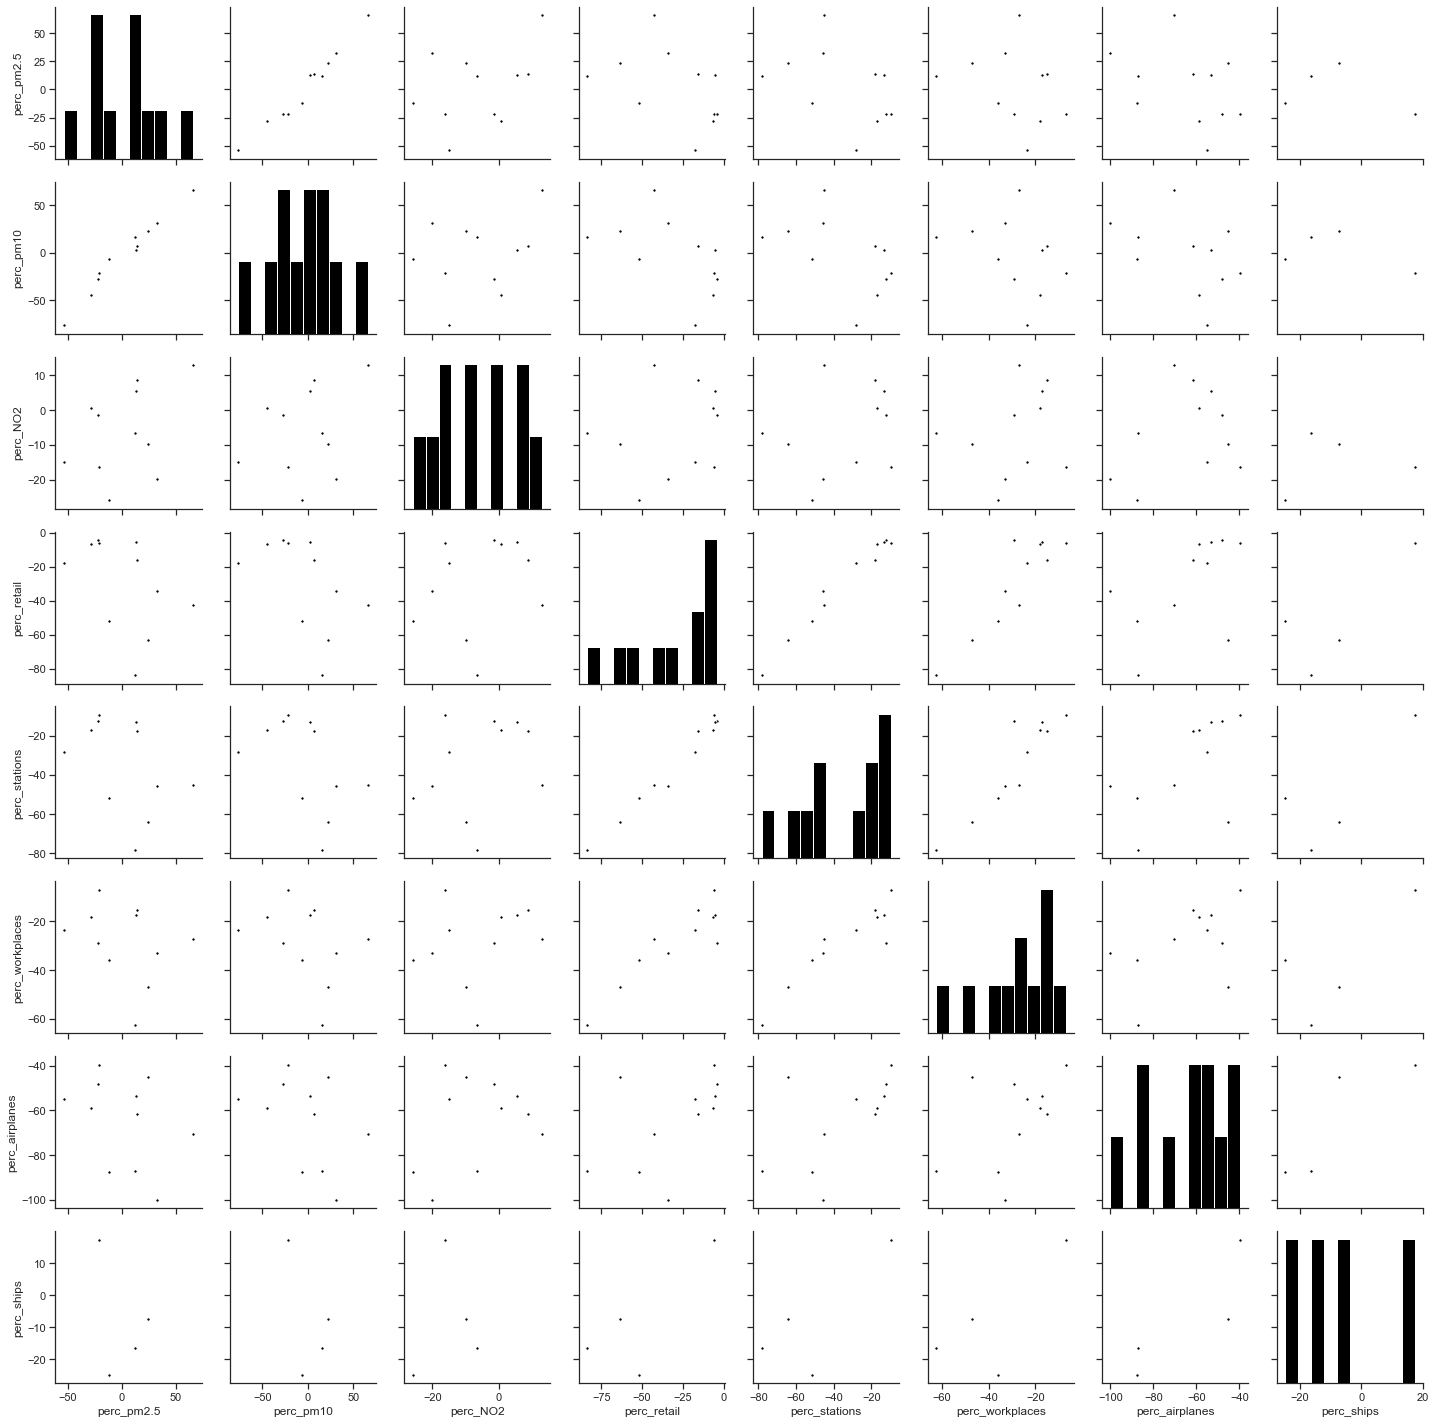

In [4]:
# this block defines the correlation matrix between all elementary indicators
print("This is the correlation matrix of all elementary indicators")
sns.set(style="ticks")
sns.axes_style("white")
sns_plot = sns.pairplot(df_matrix, plot_kws = {"s":10, 'color': 'black'}, diag_kws= {'color': 'black'})

### Polarity elementary indicators <a class="anchor" id="section_3_3"></a>

| the composite index | polarity elementary indicators | concordance | trasformation |
| --- | --- | --- | --- |
| sustainable business activity index (+) | percentage particulate matter 2.5 (-) | discordant | change (+)
| ... | percentage particulate matter 10 (-) | discordant | change (+)
| ... | percentage nitrogen dioxide (-) | discordant | change (+)
| ... | percentage retail activity (+) | concordant | does not change (+)
| ... | percentage stations activity (+) | concordant | does not change (+)
| ... | percentage workplaces activity (+) | concordant | does not change (+)
| ... | percentage airplanes activity (+) | concordant | does not change (+)
| ... | percentage ships activity (+) | concordant | does not change (+)

### Polarity transformation elementary indicators <a class="anchor" id="section_3_4"></a>

##### This block defines the linear transformation for the discordant indicators (necessary for the AMPI normalization and aggragetion in the following steps)
formula: $x_{ij}'$ = max{$x_{ij}$} - $x_{ij}$

In [5]:
# these rows define the linear trasformation of discordant columns for our phenomenon
# trees density
transform_pm2 = df_matrix['perc_pm2.5'].max() - df_matrix[['perc_pm2.5']]
transform_pm10 = df_matrix['perc_pm10'].max() - df_matrix[['perc_pm10']]
transform_no2 = df_matrix['perc_NO2'].max() - df_matrix[['perc_NO2']]

In [6]:
# this block combines again the matrix, transformed columns and not transformed columns
# now the matrix has the same polarity of our phenomenon
df_all = [df_matrix[['time']], df_matrix[['perc_retail']], df_matrix[['perc_stations']], df_matrix[['perc_workplaces']], df_matrix[['perc_airplanes']], df_matrix[['perc_ships']], transform_pm2, transform_pm10, transform_no2]
matrix_trans_linear = reduce(lambda  left,right: pd.merge(left,right,how='outer', left_index=True, right_index=True), df_all)
print("This is the matrix where linear trasformation is applied")
matrix_trans_linear.head(20)

This is the matrix where linear trasformation is applied


,time,perc_retail,perc_stations,perc_workplaces,perc_airplanes,perc_ships,perc_pm2.5,perc_pm10,perc_NO2
0,2020-02,-6.02,-9.38,-7.01,-39.60,17.33,87.47,87.66,29.28
1,2020-03,-63.34,-64.26,-47.14,-45.23,-7.40,42.29,43.36,22.76
2,2020-04,-83.69,-78.29,-62.53,-86.93,-16.46,53.69,49.84,19.54
3,2020-05,-52.17,-51.69,-35.83,-87.40,-24.92,77.75,72.61,38.84
4,2020-06,-17.64,-28.17,-23.43,-55.10,NaN,119.87,142.54,27.89
5,2020-07,-6.34,-16.92,-17.98,-58.70,NaN,94.23,110.52,12.46
6,2020-08,-4.29,-12.24,-29.01,-48.07,NaN,88.06,93.60,14.41
7,2020-09,-5.32,-13.03,-17.24,-53.38,NaN,53.19,63.02,7.44
8,2020-10,-16.02,-17.81,-15.08,-61.66,NaN,51.78,59.00,4.29
9,2020-11,-42.60,-45.08,-27.16,-70.57,NaN,0.00,0.00,0.00


### Normalization <a class="anchor" id="section_3_5"></a>

#### This block defines the AMPI normalization (Adjusted Mazziotta Pareto INdex)
min-max normalization : $y_{ij}$ = $\frac{x_{ij}- min({x_{ij})}}{max({x_{ij})}-min({x_{ij})}}$

where min(${x_{ij}}$) e max(${x_{ij}}$) are, respectively, the minimum and maximum dof the indicator j

AMPI normalization : $r_{ij}$ = $y_{ij}S+M$

where S and M are respectively 60 and 70

In [7]:
# the variables needed are created 
# drop is needed to eliminate the column time
x_min = matrix_trans_linear.drop('time', axis=1).min()
x_max = matrix_trans_linear.drop('time', axis=1).max()
x = matrix_trans_linear.drop('time', axis=1)

# define S and M
S = 60
M = 70

In [8]:
# normalization min-max is applied to all columns 
y = (x - x_min) / (x_max - x_min)
AMPI_norm = y*S+M

In [9]:
# insert again the zu column
df_AMPI_norm = df_matrix[['time']].merge(AMPI_norm, left_index=True, right_index=True)
print("This is the normalized matrix with AMPI (Adjusted Mazziotta Pareto Index)")
df_AMPI_norm.head(20)

This is the normalized matrix with AMPI (Adjusted Mazziotta Pareto Index)


,time,perc_retail,perc_stations,perc_workplaces,perc_airplanes,perc_ships,perc_pm2.5,perc_pm10,perc_NO2
0,2020-02,128.692695,130.000000,130.000000,130.000000,130.000000,113.782431,106.899116,115.231720
1,2020-03,85.377834,82.215934,86.631844,124.407285,94.880473,91.167932,88.251719,105.159629
2,2020-04,70.000000,70.000000,70.000000,82.983444,82.014201,96.874114,90.979374,100.185376
3,2020-05,93.818640,93.160644,98.854467,82.516556,70.000000,108.917160,100.564052,130.000000
4,2020-06,119.911839,113.639530,112.255043,114.602649,NaN,130.000000,130.000000,113.084449
5,2020-07,128.450882,123.434915,118.144813,111.026490,NaN,117.166097,116.521678,89.248198
6,2020-08,130.000000,127.509795,106.224784,121.586093,NaN,114.077751,109.399467,92.260556
7,2020-09,129.221662,126.821942,118.944524,116.311258,NaN,96.623842,96.527291,81.493306
8,2020-10,121.136020,122.659991,121.278818,108.086093,NaN,95.918078,94.835134,76.627188
9,2020-11,101.050378,98.915977,108.224063,99.235099,NaN,70.000000,70.000000,70.000000


### Aggregation <a class="anchor" id="section_3_6"></a>

#### This block defines the aggregation with AMPI (Adjusted Mazziotta Pareto Index)
##### (similar to geometric mean because the arithmetic mean is corrected by a penalty function)
formula: $cv_{i}$ = $\frac{S_{z}}{M_{z}}$

where: $M_{z}$ = $\frac{\sum_{j=1}^{m} z_{ij} }{m}$ e $S_{z}$ =  $\sqrt{\frac{\sum_{j=1}^{m} (z_{ij}-\bar{M_{z})^2}}{m}}$

In [10]:
# all variables needed for the formula abovementioned are defined
# drop time column 
df_AMPI = df_AMPI_norm.drop(columns=['time'], axis=1)
# mean of the z elements of the normalized matrix
z_media = df_AMPI_norm.mean(axis=1)
# standard deviation of elements z of standardized matrix
z_sigma = df_AMPI_norm.std(axis=1)
# compute cv
cv = z_sigma / z_media

##### The AMPI composite index is:

$MPI^{+/-}$ = $M_{z}$ +/- $S_{z}$ $cv_{i}$

$M_{z}$ is the mean of the z elements in horizontal and $S_{z}$ is the horizontal sigma

where the sign +/- depends on our phenomenon (our phenomenon is positive so we use -)

In [11]:
# calculating index AMPI using negative sign (because our phenomenon is positive)
AMPI_agg = z_media - z_sigma*cv
# transform the MPI index from series to dataframe
AMPI_agg = AMPI_agg.to_frame(name='ampi_index')
AMPI_agg.head(20)

,ampi_index
0,122.341112
1,92.720618
2,81.053584
3,93.981270
4,118.550703
5,113.480852
6,112.909215
7,106.461012
8,102.903541
9,84.809189


### Final composite index <a class="anchor" id="section_3_7"></a>

In [12]:
df_AMPI_index = df_AMPI_norm.merge(AMPI_agg, left_index=True, right_index=True)
df_AMPI_index = df_AMPI_index.round(2)
print("This is the matrix with the composite index computed with AMPI normalization and AMPI aggregation")
# export csv
df_AMPI_index.to_csv('../output_data/ampi_index.csv', index=False)
# prints first rows
df_AMPI_index.head(50)

This is the matrix with the composite index computed with AMPI normalization and AMPI aggregation


,time,perc_retail,perc_stations,perc_workplaces,perc_airplanes,perc_ships,perc_pm2.5,perc_pm10,perc_NO2,ampi_index
0,2020-02,128.69,130.00,130.00,130.00,130.00,113.78,106.90,115.23,122.34
1,2020-03,85.38,82.22,86.63,124.41,94.88,91.17,88.25,105.16,92.72
2,2020-04,70.00,70.00,70.00,82.98,82.01,96.87,90.98,100.19,81.05
3,2020-05,93.82,93.16,98.85,82.52,70.00,108.92,100.56,130.00,93.98
4,2020-06,119.91,113.64,112.26,114.60,NaN,130.00,130.00,113.08,118.55
5,2020-07,128.45,123.43,118.14,111.03,NaN,117.17,116.52,89.25,113.48
6,2020-08,130.00,127.51,106.22,121.59,NaN,114.08,109.40,92.26,112.91
7,2020-09,129.22,126.82,118.94,116.31,NaN,96.62,96.53,81.49,106.46
8,2020-10,121.14,122.66,121.28,108.09,NaN,95.92,94.84,76.63,102.90
9,2020-11,101.05,98.92,108.22,99.24,NaN,70.00,70.00,70.00,84.81


### Compose final dataset <a class="anchor" id="section_3_8"></a>

In [13]:
# drop all columns not needed
df_matrix_final_a = df_matrix.drop(['time'], axis = 1)
df_matrix_final_a.columns = ['pm2.5_units', 'pm10_units', 'no2_units', 'retail_units', 'stations_units', 'workplaces_units', 'airplanes_units', 'ships_units',]
df_matrix_final_a

,pm2.5_units,pm10_units,no2_units,retail_units,stations_units,workplaces_units,airplanes_units,ships_units
0,-21.51,-21.63,-16.33,-6.02,-9.38,-7.01,-39.60,17.33
1,23.67,22.67,-9.81,-63.34,-64.26,-47.14,-45.23,-7.40
2,12.27,16.19,-6.59,-83.69,-78.29,-62.53,-86.93,-16.46
3,-11.79,-6.58,-25.89,-52.17,-51.69,-35.83,-87.40,-24.92
4,-53.91,-76.51,-14.94,-17.64,-28.17,-23.43,-55.10,NaN
5,-28.27,-44.49,0.49,-6.34,-16.92,-17.98,-58.70,NaN
6,-22.10,-27.57,-1.46,-4.29,-12.24,-29.01,-48.07,NaN
7,12.77,3.01,5.51,-5.32,-13.03,-17.24,-53.38,NaN
8,14.18,7.03,8.66,-16.02,-17.81,-15.08,-61.66,NaN
9,65.96,66.03,12.95,-42.60,-45.08,-27.16,-70.57,NaN


In [14]:
final_dataset = df_AMPI_index.merge(df_matrix_final_a, left_index=True, right_index=True)
# add column with integer in order to perform a join on qgis
final_dataset['cod_join'] = 2

final_dataset

,time,perc_retail,perc_stations,perc_workplaces,perc_airplanes,perc_ships,perc_pm2.5,perc_pm10,perc_NO2,ampi_index,pm2.5_units,pm10_units,no2_units,retail_units,stations_units,workplaces_units,airplanes_units,ships_units,cod_join
0,2020-02,128.69,130.00,130.00,130.00,130.00,113.78,106.90,115.23,122.34,-21.51,-21.63,-16.33,-6.02,-9.38,-7.01,-39.60,17.33,2
1,2020-03,85.38,82.22,86.63,124.41,94.88,91.17,88.25,105.16,92.72,23.67,22.67,-9.81,-63.34,-64.26,-47.14,-45.23,-7.40,2
2,2020-04,70.00,70.00,70.00,82.98,82.01,96.87,90.98,100.19,81.05,12.27,16.19,-6.59,-83.69,-78.29,-62.53,-86.93,-16.46,2
3,2020-05,93.82,93.16,98.85,82.52,70.00,108.92,100.56,130.00,93.98,-11.79,-6.58,-25.89,-52.17,-51.69,-35.83,-87.40,-24.92,2
4,2020-06,119.91,113.64,112.26,114.60,NaN,130.00,130.00,113.08,118.55,-53.91,-76.51,-14.94,-17.64,-28.17,-23.43,-55.10,NaN,2
5,2020-07,128.45,123.43,118.14,111.03,NaN,117.17,116.52,89.25,113.48,-28.27,-44.49,0.49,-6.34,-16.92,-17.98,-58.70,NaN,2
6,2020-08,130.00,127.51,106.22,121.59,NaN,114.08,109.40,92.26,112.91,-22.10,-27.57,-1.46,-4.29,-12.24,-29.01,-48.07,NaN,2
7,2020-09,129.22,126.82,118.94,116.31,NaN,96.62,96.53,81.49,106.46,12.77,3.01,5.51,-5.32,-13.03,-17.24,-53.38,NaN,2
8,2020-10,121.14,122.66,121.28,108.09,NaN,95.92,94.84,76.63,102.90,14.18,7.03,8.66,-16.02,-17.81,-15.08,-61.66,NaN,2
9,2020-11,101.05,98.92,108.22,99.24,NaN,70.00,70.00,70.00,84.81,65.96,66.03,12.95,-42.60,-45.08,-27.16,-70.57,NaN,2


In [15]:
# export csv
final_dataset.to_csv('../output_data/final_dataset.csv', index=False)